# Nepali Text Analysis Using Python

This notebook demonstrates the natural language processing of text written in Nepali. 
In this code I analyze the book titled "फरक आकार, फरक आयाम - पुनर्बासपछिका भूटानी नेपाली कविता" published by साहित्य परिषद भूटान. 
The book is a collection of poems written by Bhutanese writers from XXX.YYY.

Some quantitative analyses in this code require contextual knowledge about Bhutanese Nepali writers, which is included in Journal Paper XXX. 
This notebook should be used to understand the technical method used for analysis and can be extended to any Nepali text. 

## Load the library
As the digital copy of the book is in MS -Word format.
 The famous Pandas are used to eat bamboo and to make Tables! I use matplotlib for plotting! 

In [1]:
from docx import Document
from docx.shared import Inches
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.figure import Figure as figure

## Load the Document
I load the document, read the Poem titles defined in the word as Heading 4, and extract Normal text under each heading as the "poems." Writer Names are defined with MS word Word style Name "Chapter Title," so I use that filter to extract them.

In [2]:
document = Document("PoetryCollection2.docx")
headings = []
texts = []
para = []
for paragraph in document.paragraphs:
    if paragraph.style.name.startswith("Heading 4"):
        if headings:
            texts.append(para)
        headings.append(paragraph.text)
        para = []
    elif paragraph.style.name == "Normal":
        para.append(paragraph.text)
if para or len(headings)>len(texts):
    texts.append(texts.append(para))
    
Writers=[]
for section  in document.paragraphs:
    if section.style.name.startswith("Chapter Title"):
        Writers.append(section.text)
        if '\n' in Writers: Writers.remove('\n')
        
h1=[]
t1=[]
for h, t in zip(headings, texts):
    h1.append(h)
    t1.append(t) 

#### Create a Table for extracted values
Now I put writers, Poem heading, and all text in a table called df! 

In [3]:
df = pd.DataFrame(columns = ["Writers","Poems","Text"])
df["Writers"]=Writers
df["Poems"]=h1
df["Text"]=t1
df.head()

,Writers,Poems,Text
0,अजित रुपाबुङ्,कसरी बाँच्नु भएको छ ?,"[म त यस्तो ठाउँमा छु, जहाँ, मान्छेहरूको ठेलमठे..."
1,अधिकारी कान्छो (परमानन्द ),हेर्ने त फेसबुक हो,"[बोल्दा हेर्न हुने बसे परपरै कस्ले बनायो कुनी,..."
2,अनन्त आचार्य,आमाको पत्र,"[मातृवात्सल्यबाट-, म यहाँसम्म आइपुग्दा, कालो र..."
3,अबिबाबु अधिकारी,पारपाचुके,"[आ-आफ्नू घमण्डले हाम्रो बाटो छुट्टियो,, सँगै ज..."
4,अम्बिकाप्रसाद दुलाल,सम्झन्छु सम्झन्छु है,"[जलढका अनि बग्छ धनसिरि नदी पश्चिम तथा पूर्वमा,..."


Let us see what the text looks like. Here I randomly print the second and the 88th  poem from the book.

In [4]:
df.Text[2]

['मातृवात्सल्यबाट-',
 'म यहाँसम्म आइपुग्दा',
 'कालो रातमा,',
 'मैँले एउटा पत्र प्राप्त गरेँ –',
 '“मबाट छुटाएर लगेपछि',
 'सदैव शान्ति रहेन ममा',
 'मेरो वरिपरि ',
 'खजुरा र बिच्छीहरू देख्छु',
 'सर्पहरू मलाई टोक्न आउँछन्',
 'बलिन्द्र आँसु',
 'असित देह लिएर',
 'म तिमीलाई पर्खन्छु',
 'यदि सकिन्छ भने',
 'मेरो अमिलो मनको बाटो भएर आऊ',
 'त्यो संसारमा',
 'सबै कुराहरू पाउनेछौँ',
 'रातपछि दिन हुन्छ',
 'म त्यो कुरिरहेको छु ।”',
 'आमाको पत्र पढिसकेपछि',
 'मेरा आँखाबाट आँसु झरेर',
 'पत्रको “तिमी आऊ”',
 'शब्द मेटियो ।',
 'मेरो हातबाट पत्र झर्\u200dयो',
 'आ…मा…..को….पत्र……!!! \n',
 'पेन्सिलभेनिया, अमेरिका  ']

In [5]:
df.Text[87]

['हो म हजारौँ चोटि पटक पटक लुटिएको मान्छे',
 'अनि सयौँ पटक ठगिनसम्म ठगिएको मान्छे',
 'भिडमा, गन्दागन्दै गन्तीमा हराएको मान्छे',
 'बोल्दाबोल्दै कैयौँ पटक बोली भासिएको मान्छे',
 'बस्दाबस्दै बसेकै ठाउँबाट लखेटिएको मान्छे',
 'हो, म आफ्नै देशबाट निकालिएको मान्छे',
 'रोग, भोक अनि नाङ्गो शरीर बुझेको मान्छे',
 'देशमा सुनगाभा र सुनाखरी रोप्न खोज्दै गर्दा मन फाटेको मान्छे ।',
 '',
 'साँच्चै हो, म आफ्नै देशबाट लखेटिएको मान्छे',
 'गाँस, बास  र कपासको भिख तिमीसँग माग्ने मान्छे',
 'पक्का हो, धेरैसँग हात फिँजाई  मागी खाएको मान्छे',
 'हो, म त असजिलो समय र परिवेशमा भिजेको मान्छे',
 'पीडा, माया ममता अनि दुःख सुख सबै बोकेको मान्छे',
 'तर, अझै पनि आकाश छुने लक्ष्य बोकेर अघि बढेको मान्छे',
 'देशमा परिवर्तन हेर्ने, भिखको ऋण तिर्ने जोस भएको मान्छे',
 'पछाडिबाट छुरा रोप्ने साथीभन्दा अगाडिबाट',
 'छुरा रोप्ने दुस्मन प्यारो मान्ने मान्छे।',
 'त्यसैले शान नदेखाऊ तिमी, म बिना कसुरको मान्छे',
 'हो, म आफ्नै देशबाट निकालिएको मान्छे',
 'साँच्चै हो, म आफ्नै देशबाट लखेटिएको मान्छे ।',
 '\n',
 'केन्टकी, अमेरिका']

As you can see, the poems are formatted and read differently. In the first printed Text (Poem 1)
There are a few Unicode characters and a few blank lines. Each element of the Text should be a list containing a line from a poem, but they are not always read correctly! I will remove Unicode characters for line splits (\n) and also remove the addresses of writers that are always at the end of the poems. 


## Preprocess Text 

#### Remove unicode character for line splits (\n) from each Text 

In [6]:
for i in range(len(df)):
    for j in range(len(df['Text'][i])):
            df['Text'][i][j]=df['Text'][i][j].replace('\n',",")

#### Remove Last lines of each poem; This is the address

In [7]:
df['Text'] = df['Text'].apply(lambda x:  np.delete(x,-1))


Now let us examine these two texts again!

In [8]:
print(df.Text[1])

['बोल्दा हेर्न हुने बसे परपरै कस्ले बनायो कुनी'
 'खोल्दा विश्व सबै छ सुन्न सकिने राखेर\xa0यान्त्रिक् ध्वनि'
 'जस्तै सङ्कटमा बसेर घरमा चिन्ता छ फेस्बूकको'
 'सारै कष्ट परे भए सरलता हेर्ने त फेस्बूक हो।।'
 'धेरै चिन्तन छन् गरे मन परे लाग्दैन पैसा अनि'
 'बाँडी हेर्न सकिन्छ रे मन गरे सेयर् गरेरै पनि।।'
 'योगा ध्यान गरे खिचेर भिडियो हाल्ने त फेस्बूक भो'
 'आमा, दाजु, दिदी र भाइ-बहिनी हेर्ने त फेस्बूक हो।।'
 'मान्छे जन्म हुँदा छ हर्षित उता हालेर फोटो निकै'
 'धेरै पाठ पढी बनेर गतिलो हाल्दा छ फोटो ठिकै।'
 'राजा या जनता र शासक सबै डुब्ने त फेस्बूक भो'
 'झुप्रोमा घरमा बसे सहरमा हेर्ने त फेस्बूक हो।।'
 'लाग्दा भोक उता किनेर मसिनो हालेर फेस्बूकमा'
 'खान्छन् झट्ट किनी गई झटपटी मान्छे त होटेलमा।'
 'भान्सा भात लिटो चढाउनु अघी\xa0हाल्ने त फेस्बूकभो,आधा घण्ट नभै बसेर अलिबेर् हेर्ने त फेस्बूक हो।।'
 ',' 'कस्ले के गहना किने पसलमा पैसा तिरेछन् कति'
 'बाली खेत खिची बताउँछ छिटो केके भयो उन्नति।'
 'कोदालो हँसिया चलाउनु अघी फेरेर फेस्बूकको'
 'बाँझो खन्न परे चिया दिनुपरे हेर्ने त फेस्बूक हो।।'
 'जाँदा बाथ्रुममा 

In [9]:
print(df.Text[87])

['हो म हजारौँ चोटि पटक पटक लुटिएको मान्छे'
 'अनि सयौँ पटक ठगिनसम्म ठगिएको मान्छे'
 'भिडमा, गन्दागन्दै गन्तीमा हराएको मान्छे'
 'बोल्दाबोल्दै कैयौँ पटक बोली भासिएको मान्छे'
 'बस्दाबस्दै बसेकै ठाउँबाट लखेटिएको मान्छे'
 'हो, म आफ्नै देशबाट निकालिएको मान्छे'
 'रोग, भोक अनि नाङ्गो शरीर बुझेको मान्छे'
 'देशमा सुनगाभा र सुनाखरी रोप्न खोज्दै गर्दा मन फाटेको मान्छे ।' ''
 'साँच्चै हो, म आफ्नै देशबाट लखेटिएको मान्छे'
 'गाँस, बास  र कपासको भिख तिमीसँग माग्ने मान्छे'
 'पक्का हो, धेरैसँग हात फिँजाई  मागी खाएको मान्छे'
 'हो, म त असजिलो समय र परिवेशमा भिजेको मान्छे'
 'पीडा, माया ममता अनि दुःख सुख सबै बोकेको मान्छे'
 'तर, अझै पनि आकाश छुने लक्ष्य बोकेर अघि बढेको मान्छे'
 'देशमा परिवर्तन हेर्ने, भिखको ऋण तिर्ने जोस भएको मान्छे'
 'पछाडिबाट छुरा रोप्ने साथीभन्दा अगाडिबाट'
 'छुरा रोप्ने दुस्मन प्यारो मान्ने मान्छे।'
 'त्यसैले शान नदेखाऊ तिमी, म बिना कसुरको मान्छे'
 'हो, म आफ्नै देशबाट निकालिएको मान्छे'
 'साँच्चै हो, म आफ्नै देशबाट लखेटिएको मान्छे ।' ',']


The texts are much better; the poems are readable,  but I am not interested in analyzing each line but rather in analyzing words, so I will split each poem by word and make a new column!
After making a list of all words in a poem, I will use some filters to remove punctuations and unwanted Unicode characters! 

####  Make a new column with list of words

In [10]:
df['Words']=df['Text'].apply(lambda x: str(x).split(" "))

### Now Remove punctuation, unwanted Unicode characters, and empty words.


In [11]:
punctuations = ['–','.','”','“','‘','’', '\n', 'nn','n', '।','/','!!','!!!', '"','`', '+', '"', '?', '▁','(', '$', '@', '[', '_', "'", '!', ',', ':', '^', '|', ']', '=', '%', '&', '.', ')', '(', '#', '*', '', ';', '-', '}','|','"',
               '॥','—', '——', '……', '…………', '…']
numbers=['०','१', '२','३', '४', '५', '६', '७', '८', '९']
unicode=['\u200d', '\nn', '\\', "''\n", "'\n","''\n","।।'", 'u200d','xa0','👎', '👍' ]

to_be_removed =  punctuations+unicode+numbers
for i in range(len(df)):
    for j in range(len(df['Words'][i])):
        for char in to_be_removed: 
            df['Words'][i][j]=df['Words'][i][j].replace(char,"")
            
# Remove empty words! 
for i in range(len(df)):
    df['Words'][i]=list(filter(None, df['Words'][i]))            


Let's examine words in the two example poems.

In [12]:
print(df.Words[1])

['बोल्दा', 'हेर्न', 'हुने', 'बसे', 'परपरै', 'कस्ले', 'बनायो', 'कुनी', 'खोल्दा', 'विश्व', 'सबै', 'छ', 'सुन्न', 'सकिने', 'राखेरयान्त्रिक्', 'ध्वनि', 'जस्तै', 'सङ्कटमा', 'बसेर', 'घरमा', 'चिन्ता', 'छ', 'फेस्बूकको', 'सारै', 'कष्ट', 'परे', 'भए', 'सरलता', 'हेर्ने', 'त', 'फेस्बूक', 'हो', 'धेरै', 'चिन्तन', 'छन्', 'गरे', 'मन', 'परे', 'लाग्दैन', 'पैसा', 'अनि', 'बाँडी', 'हेर्न', 'सकिन्छ', 'रे', 'मन', 'गरे', 'सेयर्', 'गरेरै', 'पनि', 'योगा', 'ध्यान', 'गरे', 'खिचेर', 'भिडियो', 'हाल्ने', 'त', 'फेस्बूक', 'भो', 'आमा', 'दाजु', 'दिदी', 'र', 'भाइबहिनी', 'हेर्ने', 'त', 'फेस्बूक', 'हो', 'मान्छे', 'जन्म', 'हुँदा', 'छ', 'हर्षित', 'उता', 'हालेर', 'फोटो', 'निकै', 'धेरै', 'पाठ', 'पढी', 'बनेर', 'गतिलो', 'हाल्दा', 'छ', 'फोटो', 'ठिकै', 'राजा', 'या', 'जनता', 'र', 'शासक', 'सबै', 'डुब्ने', 'त', 'फेस्बूक', 'भो', 'झुप्रोमा', 'घरमा', 'बसे', 'सहरमा', 'हेर्ने', 'त', 'फेस्बूक', 'हो', 'लाग्दा', 'भोक', 'उता', 'किनेर', 'मसिनो', 'हालेर', 'फेस्बूकमा', 'खान्छन्', 'झट्ट', 'किनी', 'गई', 'झटपटी', 'मान्छे', 'त', 'होटेलमा', 'भान्सा', '

In [13]:
print(df.Words[87])

['हो', 'म', 'हजारौँ', 'चोटि', 'पटक', 'पटक', 'लुटिएको', 'मान्छे', 'अनि', 'सयौँ', 'पटक', 'ठगिनसम्म', 'ठगिएको', 'मान्छे', 'भिडमा', 'गन्दागन्दै', 'गन्तीमा', 'हराएको', 'मान्छे', 'बोल्दाबोल्दै', 'कैयौँ', 'पटक', 'बोली', 'भासिएको', 'मान्छे', 'बस्दाबस्दै', 'बसेकै', 'ठाउँबाट', 'लखेटिएको', 'मान्छे', 'हो', 'म', 'आफ्नै', 'देशबाट', 'निकालिएको', 'मान्छे', 'रोग', 'भोक', 'अनि', 'नाङ्गो', 'शरीर', 'बुझेको', 'मान्छे', 'देशमा', 'सुनगाभा', 'र', 'सुनाखरी', 'रोप्न', 'खोज्दै', 'गर्दा', 'मन', 'फाटेको', 'मान्छे', 'साँच्चै', 'हो', 'म', 'आफ्नै', 'देशबाट', 'लखेटिएको', 'मान्छे', 'गाँस', 'बास', 'र', 'कपासको', 'भिख', 'तिमीसँग', 'माग्ने', 'मान्छे', 'पक्का', 'हो', 'धेरैसँग', 'हात', 'फिँजाई', 'मागी', 'खाएको', 'मान्छे', 'हो', 'म', 'त', 'असजिलो', 'समय', 'र', 'परिवेशमा', 'भिजेको', 'मान्छे', 'पीडा', 'माया', 'ममता', 'अनि', 'दुःख', 'सुख', 'सबै', 'बोकेको', 'मान्छे', 'तर', 'अझै', 'पनि', 'आकाश', 'छुने', 'लक्ष्य', 'बोकेर', 'अघि', 'बढेको', 'मान्छे', 'देशमा', 'परिवर्तन', 'हेर्ने', 'भिखको', 'ऋण', 'तिर्ने', 'जोस', 'भएको', 'मान्छे', 'प

Almost all of the unwanted texts are now gone, and the list consists of pure words. Now we will do some simple analysis. 


## Analysis
I will make a word count for counting the number of words in each poem. After that, I will find three writers who wrote the longest and shortest three poems. In a literary sense, this analysis has no value. Staking words doesn't make poems; neither a short one is the best. However, in the quantitive world, finding long and short is interesting, to say the least. 



#### Make a word count table and print Poets who wrote long poems! 

In [14]:
df['word_count']=df['Words'].apply(lambda x: len(x))

In [15]:
indexH=df.sort_values('word_count', axis=0, ascending=False)[0:3].index
df.loc[indexH,['Writers','Poems','word_count']]

,Writers,Poems,word_count
131,यतिराज अजनबी,केही यक्ष प्रश्नहरू,795
6,आइती राई,मेरो प्रश्न छ,760
117,विश्वास लामा,जीवनको ग्रेटवाल उभिएर,652


In [16]:
indexS=df.sort_values('word_count', axis=0, ascending=True)[0:3].index
df.loc[indexS,['Writers','Poems','word_count']]

,Writers,Poems,word_count
56,डी. एन्. काफ्ले,शहीद र म,40
102,मौसमी ढुङ्गाना,दशैँको याद,50
82,पुजन राई,चित्र,52


"यतिराज अजनबी" Has an awful lot of questions! God knows how long the answers would be; I better write a book for him. 
Joke aside, let's read the shortest Poem, shall we? 

In [17]:
print(df.loc[indexS[0],'Text'])

['उसले माटो पियो' 'माटोमै रोप्यो जिन्दगी' 'र निर्भय'
 'फुलायो जिन्दगी भित्रका' 'हजार सपनाहरू' 'अपार मुस्कानहरू ।' 'म नाथु !'
 'जिन्दगीको लालचमा फसेर' 'स्वप्नभित्र स्वप्न रोपेँ' 'र बाटा लागेँ'
 'म पलपल मरेर बाँचिरहेँ' '-एकादेशको नागरिक भएँ' 'ऊ मरेर पलपल बाँचिरह्यो'
 '-पुण्यभूमिको शहीद भयो । ,']


For a quantitive analyst, an analysis is not complete without a graph, so let's do one!  


<AxesSubplot:ylabel='Number of word per poem'>

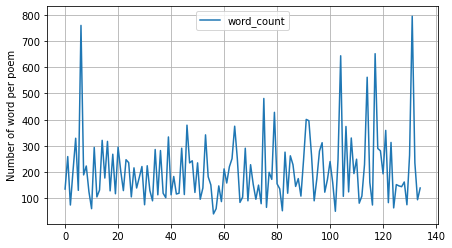

In [18]:
df.plot(y = 'word_count',figsize=(7,4), grid=True,ylabel='Number of word per poem')

## Classification by writers  (Sex, Country) and Categories of Poems and creation of a new table!

The Editors of the Original book defined the book's poems, writers, and categories. They divided each poem into 18 themes and categorized each poem into 5 Broad Categories. 
I got an excel sheet from the editors, and this sheet was different from the book. But we can use pandas to do some manipulations! 

I read the excel tables (From a sheet called Coding-old.xlsx), stripped all spaces, and matched "Poem Names" to get data on Poets and Poems to the existing table.


In [19]:
A=pd.read_excel('Coding-old-old.xlsx',sheet_name='This')
A['Poem']=A['Poem'].str.strip()
df['Poems']=df['Poems'].str.strip()
df3 = pd.merge(df, A, left_on="Poems", right_on="Poem",how='inner')
print(len(df3))
df3.head()

132


,Writers,Poems,Text,Words,word_count,Poet,Gender,Country,Region,Poem,G/P,Theme,Broad category
0,अजित रुपाबुङ्,कसरी बाँच्नु भएको छ ?,"[म त यस्तो ठाउँमा छु, जहाँ, मान्छेहरूको ठेलमठे...","[म, त, यस्तो, ठाउँमा, छु, जहाँ, मान्छेहरूको, ठ...",135,अजित रुपाबुङ,M,USA,VT,कसरी बाँच्नु भएको छ ?,G,"N, I, SK",NaN
1,अधिकारी कान्छो (परमानन्द ),हेर्ने त फेसबुक हो,"[बोल्दा हेर्न हुने बसे परपरै कस्ले बनायो कुनी,...","[बोल्दा, हेर्न, हुने, बसे, परपरै, कस्ले, बनायो...",259,अधिकारि कान्छो परमानन्द,M,USA,PA,हेर्ने त फेसबुक हो,P,"C, SSA",NaN
2,अनन्त आचार्य,आमाको पत्र,"[मातृवात्सल्यबाट-, म यहाँसम्म आइपुग्दा, कालो र...","[मातृवात्सल्यबाट, म, यहाँसम्म, आइपुग्दा, कालो,...",74,अनन्त आचार्य,M,Australia,NaN,आमाको पत्र,G,SSA,NaN
3,अबिबाबु अधिकारी,पारपाचुके,"[आ-आफ्नू घमण्डले हाम्रो बाटो छुट्टियो,, सँगै ज...","[आआफ्नू, घमण्डले, हाम्रो, बाटो, छुट्टियो, सँगै...",205,अबिबाबु अधिकारी,M,USA,PA,पारपाचुके,G,SS,NaN
4,अम्बिकाप्रसाद दुलाल,सम्झन्छु सम्झन्छु है,"[जलढका अनि बग्छ धनसिरि नदी पश्चिम तथा पूर्वमा,...","[जलढका, अनि, बग्छ, धनसिरि, नदी, पश्चिम, तथा, प...",329,अम्बिकाप्रसाद दुलाल,M,Australia,NaN,सम्झन्छु सम्झन्छु है,P,"N, DP, SK",NaN


The Length of the new table is longer than the original one. There must be some problems. Let's check if there are any duplicate Poems that got copied twice! 

In [20]:
seen = set()
dupes = [x for x in df.Poems if x in seen or seen.add(x)] 
df3[df3.Poems.isin(dupes)].head()

,Writers,Poems,Text,Words,word_count,Poet,Gender,Country,Region,Poem,G/P,Theme,Broad category
27,खगेन्द्र भण्डारी “जन्तरे”,मान्छे,"[बोकी घमन्डको भारी मान्छे सर्छ सधैँ पर ।, खुट्...","[बोकी, घमन्डको, भारी, मान्छे, सर्छ, सधैँ, पर, ...",179,खगेन्द्र भण्डारी जन्तरे,M,USA,OH,मान्छे,P,SC,NaN
28,खगेन्द्र भण्डारी “जन्तरे”,मान्छे,"[बोकी घमन्डको भारी मान्छे सर्छ सधैँ पर ।, खुट्...","[बोकी, घमन्डको, भारी, मान्छे, सर्छ, सधैँ, पर, ...",179,गोविन्द लुइँटेल,M,USA,OH,मान्छे,G,SSA,NaN
29,गोविन्द लुइँटेल,मान्छे,"[मान्छे-, एउटा ढाकर भरीको सुन्तला जति, रिस-राग...","[मान्छे, एउटा, ढाकर, भरीको, सुन्तला, जति, रिसर...",129,खगेन्द्र भण्डारी जन्तरे,M,USA,OH,मान्छे,P,SC,NaN
30,गोविन्द लुइँटेल,मान्छे,"[मान्छे-, एउटा ढाकर भरीको सुन्तला जति, रिस-राग...","[मान्छे, एउटा, ढाकर, भरीको, सुन्तला, जति, रिसर...",129,गोविन्द लुइँटेल,M,USA,OH,मान्छे,G,SSA,NaN


Indeed the poem titled 'मान्छे'is repeated. That created two duplicates! I will find out if there are two poems of the same name! If so, I will drop duplicates! I also drop some unwanted columns inherited from the old Table

In [21]:
df4=df3.drop_duplicates(subset=['Poems','Writers'], keep='first')
df4=df4.drop(columns=['Poet','Poem', 'G/P','Broad category'])
df4[df4.Poems=='मान्छे'].head()

,Writers,Poems,Text,Words,word_count,Gender,Country,Region,Theme
27,खगेन्द्र भण्डारी “जन्तरे”,मान्छे,"[बोकी घमन्डको भारी मान्छे सर्छ सधैँ पर ।, खुट्...","[बोकी, घमन्डको, भारी, मान्छे, सर्छ, सधैँ, पर, ...",179,M,USA,OH,SC
29,गोविन्द लुइँटेल,मान्छे,"[मान्छे-, एउटा ढाकर भरीको सुन्तला जति, रिस-राग...","[मान्छे, एउटा, ढाकर, भरीको, सुन्तला, जति, रिसर...",129,M,USA,OH,SC


Now I make a plot of Poets and Poems by classified country of origin.

<AxesSubplot:ylabel='Numbers'>

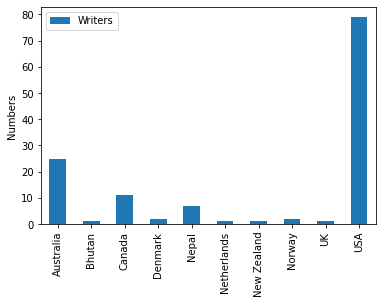

In [22]:
df4.groupby(by=['Country'],as_index=False)[df4.columns[:1]].nunique().plot(kind='bar',x='Country',ylabel='Numbers', xlabel="")

<AxesSubplot:xlabel='Theme'>

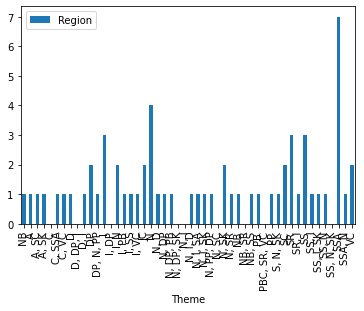

In [23]:
df4.groupby(by=['Theme'],as_index=False)[df4.columns[7]].nunique().plot(kind='bar',x='Theme')

Poems had multiple themes, and they were stored in the same column. This is not effective for programming. I will split them into primary and secondary themes. One poem has up to 4 themes
I make new tables with themes for each poem but only included 4 themes! 


In [24]:
import collections
df4['ThemeTemp'] = df4['Theme'].apply(lambda x: str(x).split(","))
ThemeList=[item for sublist in df4['ThemeTemp'] for item in sublist]
Themefrequency = collections.Counter(ThemeList)
print('Poems were categorised in to the following themes:\n', np.unique([item for sublist in df4['ThemeTemp'] for item in sublist]))
len(np.unique([item for sublist in df4['ThemeTemp'] for item in sublist]))

Poems were categorised in to the following themes:
 [' D' ' DP' ' I' ' N' ' NB' ' PB' ' PP' ' SA' ' SC' ' SK' ' SR' ' SS'
 ' SSA' ' VC' 'A' 'C' 'D' 'DP' 'I' 'JC' 'N' 'NB' 'PB' 'PBC' 'PP' 'S' 'SC'
 'SR' 'SS' 'SSA' 'VC']


31

In [25]:
df4['Theme1']=df4['ThemeTemp'].apply(lambda x: x[0])
df4['Theme2']=df4['ThemeTemp'].apply(lambda x: x[1] if len(x)>1 else 'None' )
df4['Theme3']=df4['ThemeTemp'].apply(lambda x: x[2] if len(x)>2 else 'None' )
df4['Theme4']=df4['ThemeTemp'].apply(lambda x: x[3] if len(x)>3 else 'None' )


df4['Theme1']=df4['Theme1'].apply(lambda x: str(x).strip())
df4['Theme2']=df4['Theme2'].apply(lambda x: str(x).strip())
df4['Theme3']=df4['Theme3'].apply(lambda x: str(x).strip())
df4['Theme4']=df4['Theme4'].apply(lambda x: str(x).strip())
df4=df4.drop(columns=['ThemeTemp'])

<BarContainer object of 19 artists>

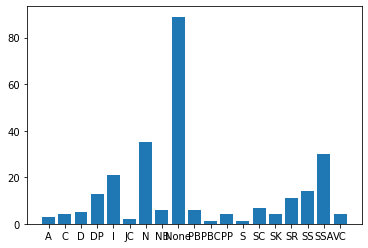

In [26]:
df4.groupby(['Theme1', 'Theme2']).size()
a,b=np.unique(df4[['Theme1', 'Theme2']],return_counts=True)
plt.bar(a,b)

These plots show Primary and Secondary theme distribution for each poem. Not all poems have a secondary theme. Therefore it isNone in Plot 2. 
Bhutanese writers are romantic; Fancy any of them? 




Apart from these small categories Poems are classified into 5 Broder categories and this is in this table, SO I read it and show here

In [27]:
Table=pd.read_excel('Coding-old.xlsx',sheet_name='CatName')
Table

,Code,Name,BigCat,BigCatName
0,PP,Prakritiprem,APS,"आध्यात्म, प्रकृति र शाश्वतता"
1,S,Sringarik,APS,"आध्यात्म, प्रकृति र शाश्वतता"
2,A,Aadhyatma,APS,"आध्यात्म, प्रकृति र शाश्वतता"
3,JC,Jivan chintan,APS,"आध्यात्म, प्रकृति र शाश्वतता"
4,CD,Cyberspace,BP,विश्ववोध र पर्यावरण
5,PBC,paryavaran,BP,विश्ववोध र पर्यावरण
6,D,Diaspora,BP,विश्ववोध र पर्यावरण
7,VC,Vishwa chintan,BP,विश्ववोध र पर्यावरण
8,NB,Naribadi,NSA,नारीवाद र सीमान्त आवाज
9,SS,samajik sarokar,NSA,नारीवाद र सीमान्त आवाज


A Few mapping manipulations to create a table with Broad Categories! 

In [28]:
APS=list(Table[Table.BigCat=='APS'].Code.values)
BP=list(Table[Table.BigCat=='BP'].Code.values)
SSS=list(Table[Table.BigCat=='SSS'].Code.values)
PDM=list(Table[Table.BigCat=='PDM'].Code.values)
NSA=list(Table[Table.BigCat=='NSA'].Code.values)


def BroadCat(x):
    APS=list(Table[Table.BigCat=='APS'].Code.values)
    BP=list(Table[Table.BigCat=='BP'].Code.values)
    SSS=list(Table[Table.BigCat=='SSS'].Code.values)
    PDM=list(Table[Table.BigCat=='PDM'].Code.values)
    NSA=list(Table[Table.BigCat=='NSA'].Code.values)
    if type(x)==str:
        x=x.strip()
        
    if x ==0:
        BroadCat1='Null'
    elif x in str(APS):
        BroadCat1='APS'
    elif x in str(BP):
            BroadCat1='BP'
    elif x in str(SSS):
            BroadCat1='SSS'
    elif x in str(PDM):
            BroadCat1='PDM'
    elif x in str(NSA):
            BroadCat1='NSA' 
    else:
        BroadCat1='Null'
    return BroadCat1

df4['BroadCat1']=df4['Theme1'].apply(lambda x: BroadCat(x))
df4['BroadCat2']=df4['Theme2'].apply(lambda x: BroadCat(x))
df4['BroadCat3']=df4['Theme3'].apply(lambda x: BroadCat(x))
df4['BroadCat4']=df4['Theme4'].apply(lambda x: BroadCat(x))

In [29]:
df4.head()

,Writers,Poems,Text,Words,word_count,Gender,Country,Region,Theme,Theme1,Theme2,Theme3,Theme4,BroadCat1,BroadCat2,BroadCat3,BroadCat4
0,अजित रुपाबुङ्,कसरी बाँच्नु भएको छ ?,"[म त यस्तो ठाउँमा छु, जहाँ, मान्छेहरूको ठेलमठे...","[म, त, यस्तो, ठाउँमा, छु, जहाँ, मान्छेहरूको, ठ...",135,M,USA,VT,"N, I, SK",N,I,SK,None,SSS,PDM,SSS,Null
1,अधिकारी कान्छो (परमानन्द ),हेर्ने त फेसबुक हो,"[बोल्दा हेर्न हुने बसे परपरै कस्ले बनायो कुनी,...","[बोल्दा, हेर्न, हुने, बसे, परपरै, कस्ले, बनायो...",259,M,USA,PA,"C, SSA",C,SSA,None,None,APS,SSS,Null,Null
2,अनन्त आचार्य,आमाको पत्र,"[मातृवात्सल्यबाट-, म यहाँसम्म आइपुग्दा, कालो र...","[मातृवात्सल्यबाट, म, यहाँसम्म, आइपुग्दा, कालो,...",74,M,Australia,NaN,SSA,SSA,None,None,None,SSS,Null,Null,Null
3,अबिबाबु अधिकारी,पारपाचुके,"[आ-आफ्नू घमण्डले हाम्रो बाटो छुट्टियो,, सँगै ज...","[आआफ्नू, घमण्डले, हाम्रो, बाटो, छुट्टियो, सँगै...",205,M,USA,PA,SS,SS,None,None,None,SSS,Null,Null,Null
4,अम्बिकाप्रसाद दुलाल,सम्झन्छु सम्झन्छु है,"[जलढका अनि बग्छ धनसिरि नदी पश्चिम तथा पूर्वमा,...","[जलढका, अनि, बग्छ, धनसिरि, नदी, पश्चिम, तथा, प...",329,M,Australia,NaN,"N, DP, SK",N,DP,SK,None,SSS,PDM,SSS,Null


This Table (df4) includes information on Original Themes and Broad Categories, including Poet Information and the poem text!

## Word analysis of the whole book 
I start by making a list of all words in the book, printing unique words, and cleaning along the way!


In [30]:

Allwords=[item for sublist in df4['Words'] for item in sublist]
print('There are' , len(np.unique(Allwords)), 'unique words in the Book')
print(' Most repeated 20 words: \n', np.unique(Allwords)[1:20])

There are 10496 unique words in the Book
 Most repeated 20 words: 
 ['B4' 'अँ' 'अँगाला' 'अँगाले' 'अँगालो' 'अँगालोमा' 'अँगालोहरूमा' 'अँगाल्छु'
 'अँगाल्न' 'अँगेरी' 'अँजुली' 'अँधेरी' 'अँध्यारो' 'अँध्यारोभित्र'
 'अँध्यारोमा' 'अंक' 'अकमक्क' 'अकर्मण्यताले' 'अकस्मात्']


Oh! Where did this 'B4' Come from? Let me find out! 

In [31]:
for i in range(len(df)):
    if ('B4' in df.Words[i]):
        print("Element is in Poem ", df.loc[i,'Poems'], " written by ",df.loc[i,'Writers'] )


Element is in Poem  सास रहेसम्म आस  written by  लक्की राशि 


Shout out to "लक्की राशि" who must have been from Sector B/4. This is an inside joke; you won't get it! It is good to understand not everything is understandable to you! 


#### Frequency count and WordCloud 
Let's find the most repetitive words and frequencies. I will print 50 most frequent words! 
I use a pakage called collections for this.


In [32]:
import collections
frequency = collections.Counter(Allwords)
mostCommon=frequency.most_common(50)
print(mostCommon)

[('र', 454), ('म', 432), ('छ', 327), ('पनि', 278), ('मेरो', 233), ('हो', 209), ('त', 190), ('अनि', 164), ('मलाई', 154), ('तर', 144), ('यो', 138), ('नै', 128), ('त्यो', 126), ('तिमी', 120), ('छु', 113), ('तिम्रो', 107), ('एक', 91), ('थियो', 86), ('अब', 84), ('एउटा', 79), ('छैन', 78), ('भए', 77), ('मैले', 77), ('मेरा', 76), ('ती', 75), ('किन', 74), ('थिएँ', 74), ('आज', 72), ('के', 69), ('जस्तो', 68), ('मन', 67), ('सबै', 65), ('छन्', 63), ('कि', 62), ('न', 60), ('होला', 60), ('हुन्छ', 59), ('कति', 58), ('गरी', 56), ('झैँ', 55), ('कहिले', 54), ('त्यसैले', 53), ('आफ्नै', 50), ('यी', 50), ('धेरै', 49), ('दिन', 49), ('कुनै', 48), ('भएको', 46), ('फेरि', 46), ('आफ्नो', 44)]


In [33]:
dftemp= pd.DataFrame.from_dict(frequency, orient='index').reset_index()
dftemp.to_excel('wordlistAll.xlsx',index=False)

## Lets do a word cloud of all the words

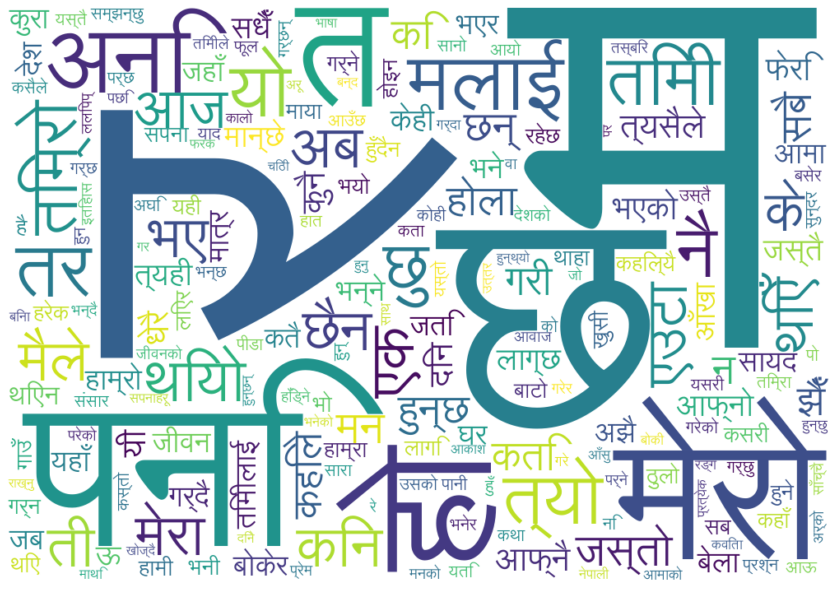

In [34]:
from wordcloud import WordCloud

font = "Lohit-Devanagari.ttf"
dictionary=frequency
wordcloud = WordCloud(width = 1000, height = 700,
                background_color ='white',
                min_font_size = 1, font_path= font, regexp=r"[\u0900-\u097F]+// \uFFFF").generate_from_frequencies(dictionary)

# plot the WordCloud image                      
plt.figure(figsize = (18, 8), facecolor = None)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

This is as best as python can do! Apparantly it has some problems with Nepali text, but that does not stop us! We will
use [Wordcloud](https://www.wordclouds.com/#:~:text=Wordclouds.com%20is%20a%20free,manually%20in%20the%20word%20list) website to produce beautiful pictures.


# Removal of small words 

I would quantify most of this as small words. If the texts were in English, I could use some API to find words belonging to unwanted classes like all the conjunctions. We do not have that luxury in our language. There are a few python classes written; explain each of them in reference and give credit! Show how they work!

We tried to use nepali_embeddings_word2vec.tx written by [Nobal B. Niraula](https://aclanthology.org/2021.repl4nlp-1.pdf) and also tried another library called Neåaæi_nlp written by [Sushil](https://github.com/sushil79g/Nepali_nlp)


If you are reading this, please develop an API that reads Nepali Sabdhakosh and helps people filter words based on the Grammatical class: For Now, I continue! I could remove all words with less than two characters, but that does not make sense. As Devkota once said, small does not mean unimportant. The only option is to define own small words based on the list we have!

I export the frequency list and mark the small words, and reread them to remove all small words. 
 

In [35]:
df3 = pd.DataFrame.from_dict(frequency, orient='index').reset_index()
df3.to_excel('wordlistImp.xlsx',index=False)

# Manual Removal of small words
The word list saved above (wordlist) is manually checked, and words to remove were identified and saved as smallwords2, which has a list of small and big words. 

In [36]:
smallword=pd.read_csv('smallwords2.csv',sep=';')
smallwords2=smallword[smallword.Column4=='remove']
smallwords=list(smallwords2.Column1.values)

## A function to remove all small words 

In [37]:
def removewords(word,smallwords):
    newlist=list(set(word)-set(smallwords))
    return newlist


# After Removal of small words 
I removed all small words and saved the file as df_Final. I will do the word count of big words and quantify the remaining big words

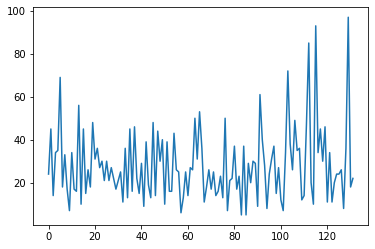

In [38]:
df_Final=df4.copy()
df_Final['Words'] = df_Final.apply(lambda row : removewords(row['Words'],
                                  smallwords), axis = 1)
df_Final['word_count']=df_Final['Words'].apply(lambda x: len(x))
df_Final['unique_big_words']=df_Final['Words'].apply(lambda x: len(np.unique(x)))
plt.plot(df_Final['word_count'])

Now I use frequency and counter library to do word cloud for text where small words are removed. 

In [39]:
AllwordsF=[item for sublist in df_Final['Words'] for item in sublist]
import collections
frequency = collections.Counter(AllwordsF)
mostCommon=frequency.most_common(50)
print('There are' , len(np.unique(AllwordsF)), 'unique words remaining')
print('Most common 50 remaining words are: \n', mostCommon)

There are 973 unique words remaining
Most common 50 remaining words are: 
 [('बेला', 25), ('माया', 23), ('थाहा', 23), ('सपना', 20), ('बाटो', 18), ('हात', 17), ('संसार', 17), ('खुसी', 16), ('सानो', 16), ('साथ', 15), ('पानी', 15), ('साँच्चै', 15), ('कालो', 14), ('समय', 14), ('फूल', 14), ('आकाश', 14), ('मनको', 13), ('प्रश्न', 13), ('मनमा', 13), ('याद', 13), ('सुन्दर', 12), ('रङ्ग', 12), ('भाषा', 12), ('मान्छे', 11), ('आँसु', 11), ('आमाको', 11), ('एक्लै', 11), ('नाम', 11), ('सपनाहरू', 11), ('पीडा', 11), ('जीवनको', 11), ('माटो', 11), ('प्यारो', 10), ('देशको', 10), ('कविता', 10), ('समाज', 10), ('उत्तर', 10), ('आशा', 10), ('घरको', 10), ('आवाज', 10), ('हातमा', 10), ('कथा', 10), ('प्रेम', 10), ('पहाड', 10), ('शब्द', 9), ('यात्रा', 9), ('विशाल', 9), ('काम', 9), ('रगत', 9), ('आखिर', 9)]


### Word Cloud again

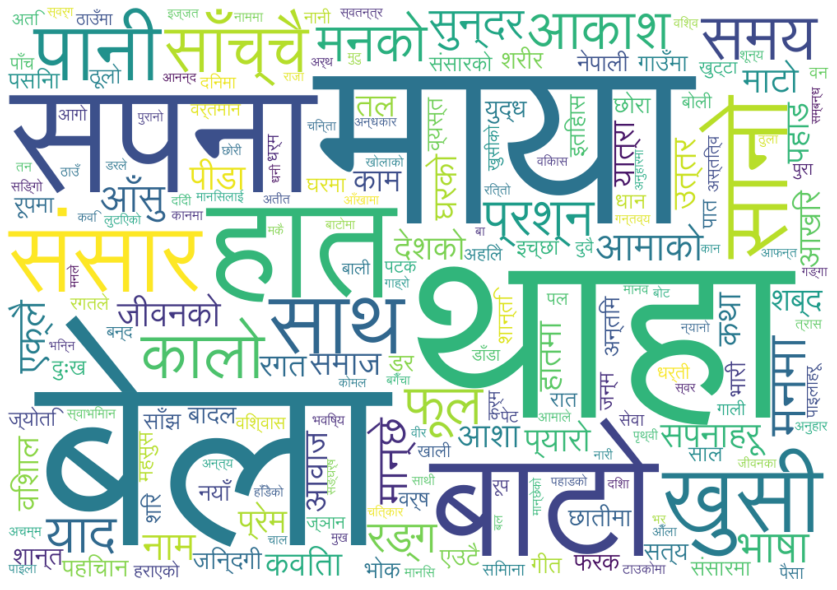

In [40]:
from wordcloud import WordCloud
import re

font = "Lohit-Devanagari.ttf"
dictionary=frequency
wordcloud = WordCloud(width = 1000, height = 700,
                background_color ='white',
                min_font_size = 1, font_path= font, regexp=r"[\u0900-\u097F]+// \uFFFF").generate_from_frequencies(dictionary)

# plot the WordCloud image                      
plt.figure(figsize = (18, 8), facecolor = None)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Assinging Categories to each Words

Each of 973 unique words that remained after cleaning was assigned manually into 181 codes and further into 18 different thematic categories. The categories are the same as the original thematic categories assigned by the Editors of the book. Unlike original qualitative categorization, here we classify words instead of poems into a category. An Excel sheet called (Coding-with-sub-categories-codes.xlsx) includes manual categorization. 

In the code, I read the excel sheet with word categories and manipulated the table. 

In [41]:
Cat=pd.read_excel('Coding-with-sub-categories-codes.xlsx')
Cat=Cat.iloc[:,:4]
Cat.head()

,Words,Frequency,Codes,Sub-categories
0,अथाह,3,dimension,A
1,कर्म,7,work,A
2,कात्रोमा,2,culture,A
3,गङ्गा,5,culture,A
4,गाई,3,farming,A


# Show the distribution of Codes

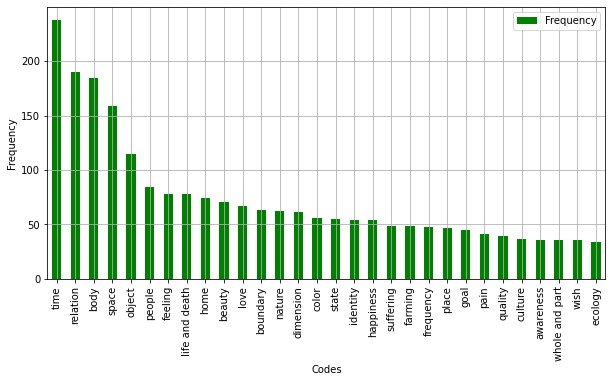

In [167]:
AA=Cat.groupby(by=['Codes'],as_index=False)[Cat.columns[1]].sum()
AA.sort_values(by ='Frequency',ascending=False)[:30].plot(x='Codes',y='Frequency',kind='bar',color='green',grid=True,figsize=(10,5), ylabel='Frequency')
plt.savefig('Histo.png')

# Determination of Poem Theme Based on Word Categories
Now I will read each Big Word of each poem and classify them into Thematic categories based on the manually created excel table. 
I count the two most repeated themes in each poem and assign these two most repeated themes of a Poem as the theme of that particular poem. In the mail article I have only discussed one theme

There are a few manipulation codes that might be understood on their own. 


In [112]:
import re
def CatofPoem(A):
    p=[]
    for i in range(len(A)):
        p.append(Cat[Cat['Words']==A[i]].loc[:,'Sub-categories'].values)
    return p
    
# A function to categorise words 

Here, I apply CatofPoem to each poem

In [113]:
df_Final['WordsC']=df_Final['Words'].apply(lambda x: CatofPoem(x))

From the list of Categories found in WordC, I count the most repeated two Categories and make two Themes! (In the article, only one category is used)

In [115]:
def FindCat(x):
    b,c =np.unique(np.array(x),return_counts=True)
    out = b[np.argsort(-c)]
    return out[0]

In [116]:
def FindCat1(x):
    b,c =np.unique(np.array(x),return_counts=True)
    if c[np.argsort(-c)][2]>=4:
        out= b[np.argsort(-c)][1]
    else:
        out='None'
    return out

In [117]:
df_Final['WordsUC']=df_Final['WordsC'].apply(lambda x: np.unique(np.array(x),return_counts=True))

In [118]:
df_Final['Catt1']=df_Final['WordsC'].apply(lambda x: FindCat(x))
df_Final['Catt2']=df_Final['WordsC'].apply(lambda x: FindCat1(x))

df_Final['BCatt1']=df_Final['Catt1'].apply(lambda x: BroadCat(x))
df_Final['BCatt2']=df_Final['Catt2'].apply(lambda x: BroadCat(x))

df_Final['Catt1']=df_Final['Catt1'].apply(lambda x: str(x))
df_Final['Catt2']=df_Final['Catt2'].apply(lambda x: str(x))

In [119]:
df_Final.head()

,Writers,Poems,Text,Words,word_count,Gender,Country,Region,Theme,Theme1,...,BroadCat4,unique_big_words,WordsC,WordsUC,Catt1,Catt2,BCatt1,BCatt2,MatchT,MatchBC
0,अजित रुपाबुङ्,कसरी बाँच्नु भएको छ ?,"[म त यस्तो ठाउँमा छु, जहाँ, मान्छेहरूको ठेलमठे...","[समग्रमा, वन, सुनौलो, न्याउली, जोर, तिहार, छाल...",24,M,USA,VT,"N, I, SK",N,...,Null,24,"[[VC], [PBC], [PP], [N], [SSA], [SK], [SSA], [...","([A, DP, JC, N, PBC, PP, SK, SS, SSA, VC], [1,...",PP,PBC,APS,BP,,
1,अधिकारी कान्छो (परमानन्द ),हेर्ने त फेसबुक हो,"[बोल्दा हेर्न हुने बसे परपरै कस्ले बनायो कुनी,...","[दाजु, राजा, ध्यान, दिनमा, उन्नति, पाठ, पूजा, ...",45,M,USA,PA,"C, SSA",C,...,Null,45,"[[SC], [SK], [A], [SSA], [PB], [JC], [A], [N],...","([A, C, DP, JC, N, PB, PP, SA, SC, SK, SR, SS,...",SSA,JC,SSS,APS,Yes,Yes
2,अनन्त आचार्य,आमाको पत्र,"[मातृवात्सल्यबाट-, म यहाँसम्म आइपुग्दा, कालो र...","[रातमा, देह, आँखाबाट, हातबाट, मनको, अमिलो, संस...",14,M,Australia,NaN,SSA,SSA,...,Null,14,"[[PP], [SSA], [SR], [SSA], [JC], [SSA], [VC], ...","([D, DP, JC, PP, SA, SR, SSA, VC], [1, 1, 3, 2...",SSA,None,SSS,Null,Yes,Yes
3,अबिबाबु अधिकारी,पारपाचुके,"[आ-आफ्नू घमण्डले हाम्रो बाटो छुट्टियो,, सँगै ज...","[रात, खुसी, अवश्य, बलियो, कसम, टुहुरा, सानु, स...",34,M,USA,PA,SS,SS,...,Null,34,"[[PBC], [JC], [SSA], [SSA], [SSA], [SA], [SS],...","([D, DP, JC, NB, PB, PBC, PP, SA, SC, SS, SSA]...",SSA,JC,SSS,APS,,Yes
4,अम्बिकाप्रसाद दुलाल,सम्झन्छु सम्झन्छु है,"[जलढका अनि बग्छ धनसिरि नदी पश्चिम तथा पूर्वमा,...","[वनले, डाँडा, राजा, न्याउली, बगैँचा, बारी, सेव...",35,M,Australia,NaN,"N, DP, SK",N,...,Null,35,"[[PBC], [PBC], [SK], [N], [PP], [DP], [SS], [P...","([DP, JC, N, PBC, PP, SC, SK, SR, SS, SSA], [3...",PP,SK,APS,SSS,,


This is the Final Table that has the original thematic categories and the new ones. 
The original Broad Categories and new Broad Categories are also included. 
The Table also includes the original text and important words removed after processing, along with Author info. 

# Machine Theme VS the Original Theme (Analysis Presented in the book) 
Here, I only compare Quantative Cattegory (Catt1) with original qualatitive Category (Up to 4)

24 Poems matched


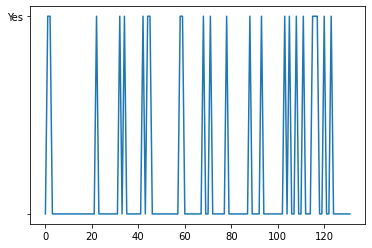

In [124]:
a=df_Final['Catt1']==df_Final['Theme1']
b=df_Final['Catt1']==df_Final['Theme2']
c=df_Final['Catt1']==df_Final['Theme3']
d=df_Final['Catt1']==df_Final['Theme4']

e=a | b
f=c | d
g=e | f
df_Final['MatchT'] = df_Final.apply(lambda _: '', axis=1)
df_Final.loc[g,'MatchT']='Yes'
plt.plot(df_Final.MatchT)
print(sum(df_Final.MatchT=='Yes'), 'Poems matched')

The plot shows only 24 poems quantified as Catt1, had a match with original qualatitive themes. 

### Comparision of Broad Categories
I match Bcatt1 (Quantative broad Categories) with qualatitive original broad themes! 

60 Poems matched


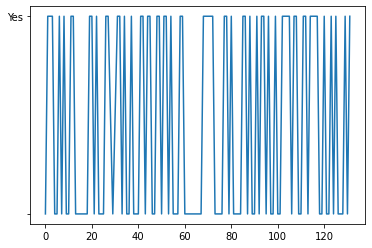

In [125]:
a=df_Final['BCatt1']==df_Final['BroadCat1']
b=df_Final['BCatt1']==df_Final['BroadCat2']
c=df_Final['BCatt1']==df_Final['BroadCat3']
d=df_Final['BCatt1']==df_Final['BroadCat4']


e=a | b
f=c | d
g=e | f
df_Final['MatchBC'] = df_Final.apply(lambda _: '', axis=1)
df_Final.loc[g,'MatchBC']='Yes'
plt.plot(df_Final.MatchBC)
print(sum(df_Final.MatchBC=='Yes'), 'Poems matched')

In [126]:
# Finally I plot this nice Figure 

C:\Users\krg\Anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\krg\Anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\krg\Anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



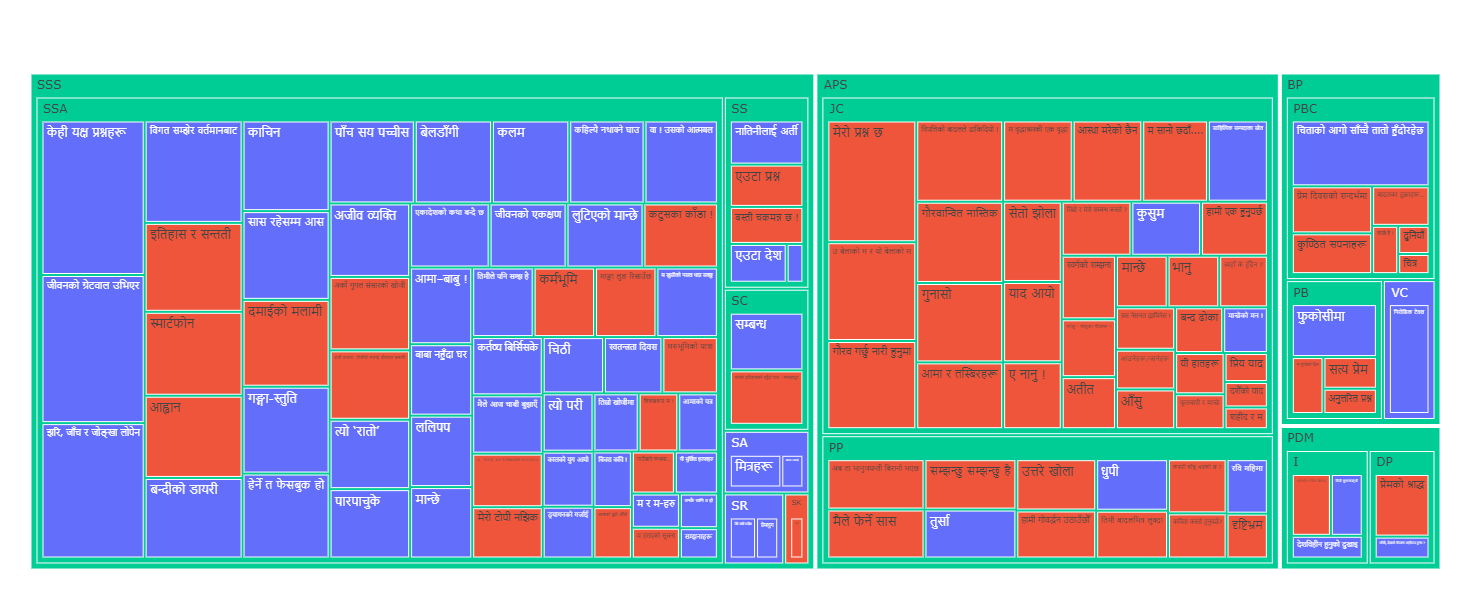

In [157]:
import plotly.express as px
fig = px.treemap(df_Final, path=[ 'BCatt1', 'Catt1', 'Poems'], values='word_count',
                  color='MatchBC', hover_data=['Poems'],
                  color_continuous_midpoint=np.average(df_Final['word_count'], weights=df_Final['word_count']), width=1000, height=600)
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

fig.show()


# Further Classification if two Quantative sub and broad Categories were used 

### A Look at the subcategory level (1st classification and the second classification)
The Match percentage was 45 when I only did 1 quantitative sub-category. Will this improve if I assign 2 quantitive sub and main categories? 


Text(0.5, 0, 'Sub Categories')

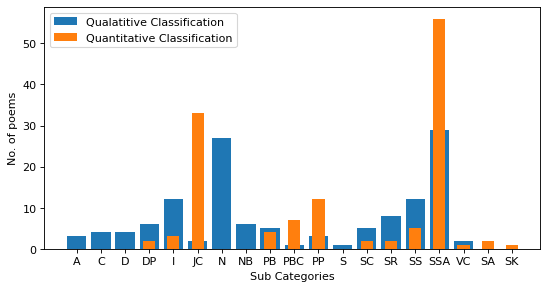

In [158]:
A=df_Final.groupby(by=['Theme1'],as_index=False)[df_Final.columns[:1]].nunique()
B=df_Final.groupby(by=['Catt1'],as_index=False)[df_Final.columns[:1]].nunique()
figure(figsize=(8, 4), dpi=80)
plt.bar(A.Theme1,A.Writers,label='Qualatitive Classification')
plt.bar(B.Catt1,B.Writers,width=0.5,label='Quantitative Classification')
plt.legend()
plt.ylabel('No. of poems')
plt.xlabel('Sub Categories')

Text(0.5, 0, 'Sub Categories')

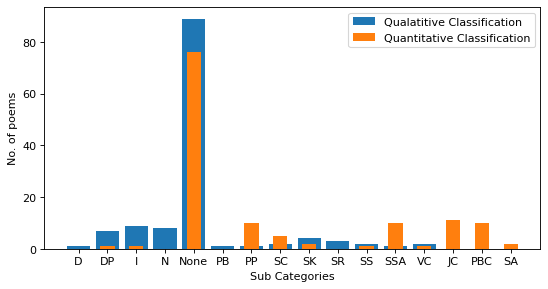

In [159]:
A=df_Final.groupby(by=['Theme2'],as_index=False)[df_Final.columns[:1]].nunique()
B=df_Final.groupby(by=['Catt2'],as_index=False)[df_Final.columns[:1]].nunique()
figure(figsize=(8, 4), dpi=80)
plt.bar(A.Theme2,A.Writers,label='Qualatitive Classification')
plt.bar(B.Catt2,B.Writers,width=0.5,label='Quantitative Classification')
plt.legend()
plt.ylabel('No. of poems')
plt.xlabel('Sub Categories')

Two system look different, why? 


# Machine Categories VS the Broad Themes

Text(0.5, 0, 'Main Category')

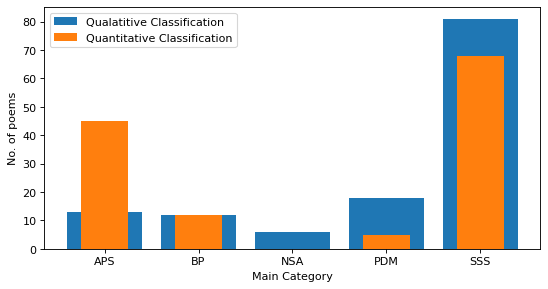

In [160]:
A=df_Final.groupby(by=['BroadCat1'],as_index=False)[df_Final.columns[:1]].nunique()
B=df_Final.groupby(by=['BCatt1'],as_index=False)[df_Final.columns[:1]].nunique()

figure(figsize=(8, 4), dpi=80)

plt.bar(A.BroadCat1,A.Writers,label='Qualatitive Classification')
plt.bar(B.BCatt1,B.Writers,width=0.5,label='Quantitative Classification')
plt.legend()
plt.ylabel('No. of poems')
plt.xlabel('Main Category')

No NSA in Machine classification! 
For sake of completeness, I also plot the same for Second Broad Category 

Text(0.5, 0, 'Main Category')

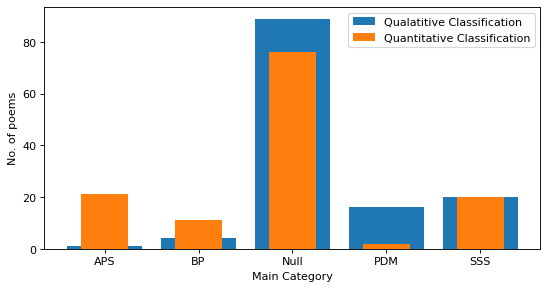

In [161]:
A=df_Final.groupby(by=['BroadCat2'],as_index=False)[df_Final.columns[:1]].nunique()
B=df_Final.groupby(by=['BCatt2'],as_index=False)[df_Final.columns[:1]].nunique()

figure(figsize=(8, 4), dpi=80)

plt.bar(A.BroadCat2,A.Writers,label='Qualatitive Classification')
plt.bar(B.BCatt2,B.Writers,width=0.5,label='Quantitative Classification')
plt.legend()
plt.ylabel('No. of poems')
plt.xlabel('Main Category')


## Find How Many Poems Matched Theme!

In [162]:
print(len(df_Final[df_Final.Theme1==df_Final.Catt1]), ' Poems Matched Primary Theme with Primary Theme (Machine)' )
print(len(df_Final[df_Final.Theme1==df_Final.Catt2]), ' Poems Matched Primary Theme with Secondary Theme (Machine)' )
print(len(df_Final[df_Final.Theme2==df_Final.Catt1]),  ' Poems Matched Secondary Theme with Primary  Theme (Machine)')
print(len(df_Final[df_Final.Theme2==df_Final.Catt2]), ' Poems Matched Secondary Theme with Secondary Theme (Machine)' )

22  Poems Matched Primary Theme with Primary Theme (Machine)
1  Poems Matched Primary Theme with Secondary Theme (Machine)
2  Poems Matched Secondary Theme with Primary  Theme (Machine)
61  Poems Matched Secondary Theme with Secondary Theme (Machine)


## Now Check Broad Categories!

In [163]:
a=df_Final.BroadCat1==df_Final.BCatt1
b=df_Final.BroadCat1==df_Final.BCatt2
c=df_Final.BroadCat2==df_Final.BCatt2
d=df_Final.BroadCat2==df_Final.BCatt2

e=a | b
f=c | d
g=e | f

print(len(df_Final[df_Final.BroadCat1==df_Final.BCatt1]), ' Poems Matched 1st Broad Category with 1st Broad Category (Machine)' )
print(len(df_Final[df_Final.BroadCat1==df_Final.BCatt2]), ' Poems Matched 1st Broad Category with 2nd Broad Category (Machine)' )
print(len(df_Final[df_Final.BroadCat2==df_Final.BCatt1]), ' Poems Matched 2nd Broad Category with 1st Broad Category (Machine)' )
print(len(df_Final[df_Final.BroadCat2==df_Final.BCatt2]), ' Poems Matched 2nd Broad Category with 2nd Broad Category (Machine)' )
print(len(df_Final[g]), ' Poems Matched at least 1 Broad Category' )

55  Poems Matched 1st Broad Category with 1st Broad Category (Machine)
15  Poems Matched 1st Broad Category with 2nd Broad Category (Machine)
10  Poems Matched 2nd Broad Category with 1st Broad Category (Machine)
65  Poems Matched 2nd Broad Category with 2nd Broad Category (Machine)
101  Poems Matched at least 1 Broad Category


So by changing the categorization, the match percentage raised a lot!